In [1]:
# If not run as a makefile target, you can download and install the client:
# pip install https://ai-engine-manager-release.s3.amazonaws.com/latest-snapshot/downloads/h2o_engine_manager-0.2.0-py3-none-any.whl
import h2o_engine_manager
import h2o


In [2]:
# Initialize AIEM clients.
aiem = h2o_engine_manager.login()
h2o_engine_client = aiem.h2o_engine_client
h2o_engine_version_client = aiem.h2o_engine_version_client


In [3]:
# List available H2O engine versions.
versions = h2o_engine_version_client.list_all_h2o_engine_versions(parent="workspaces/global")
for version in versions:
    print(f"Version: {version.name}, Aliases: {version.aliases}, Deprecated: {version.deprecated}")


Version: workspaces/global/h2oEngineVersions/3.46.0.7, Aliases: ['latest'], Deprecated: False
Version: workspaces/global/h2oEngineVersions/3.46.0.6, Aliases: [], Deprecated: False
Version: workspaces/global/h2oEngineVersions/3.46.0.5, Aliases: [], Deprecated: False


In [5]:
# Create new H2O engine.
engine = h2o_engine_client.create_engine(
    engine_id="test-h2o-engine",
    workspace_id="default",
    node_count=1,
    cpu=4,
    gpu=0,
    memory_bytes="16Gi",
    max_idle_duration="1h",
    max_running_duration="1h",
    display_name="My test H2O engine",
)


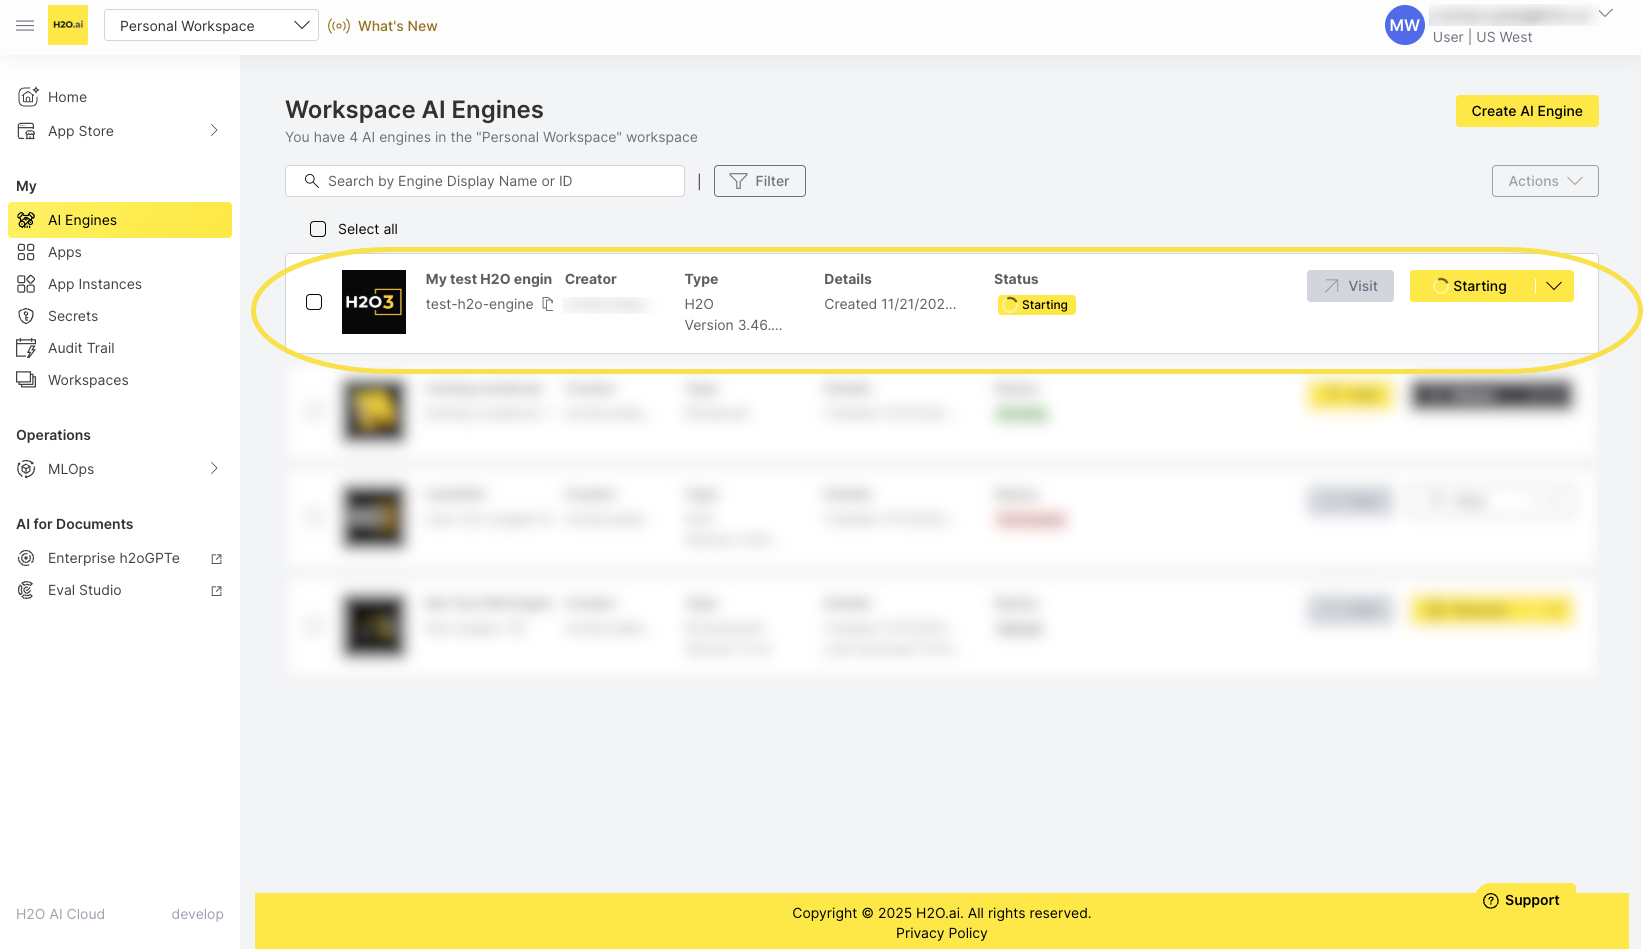

In [6]:
# Now wait for the engine to finish starting.
engine.wait()
print(f"Engine is now in state: {engine.state}")

Engine is now in state: H2OEngineState.STATE_RUNNING


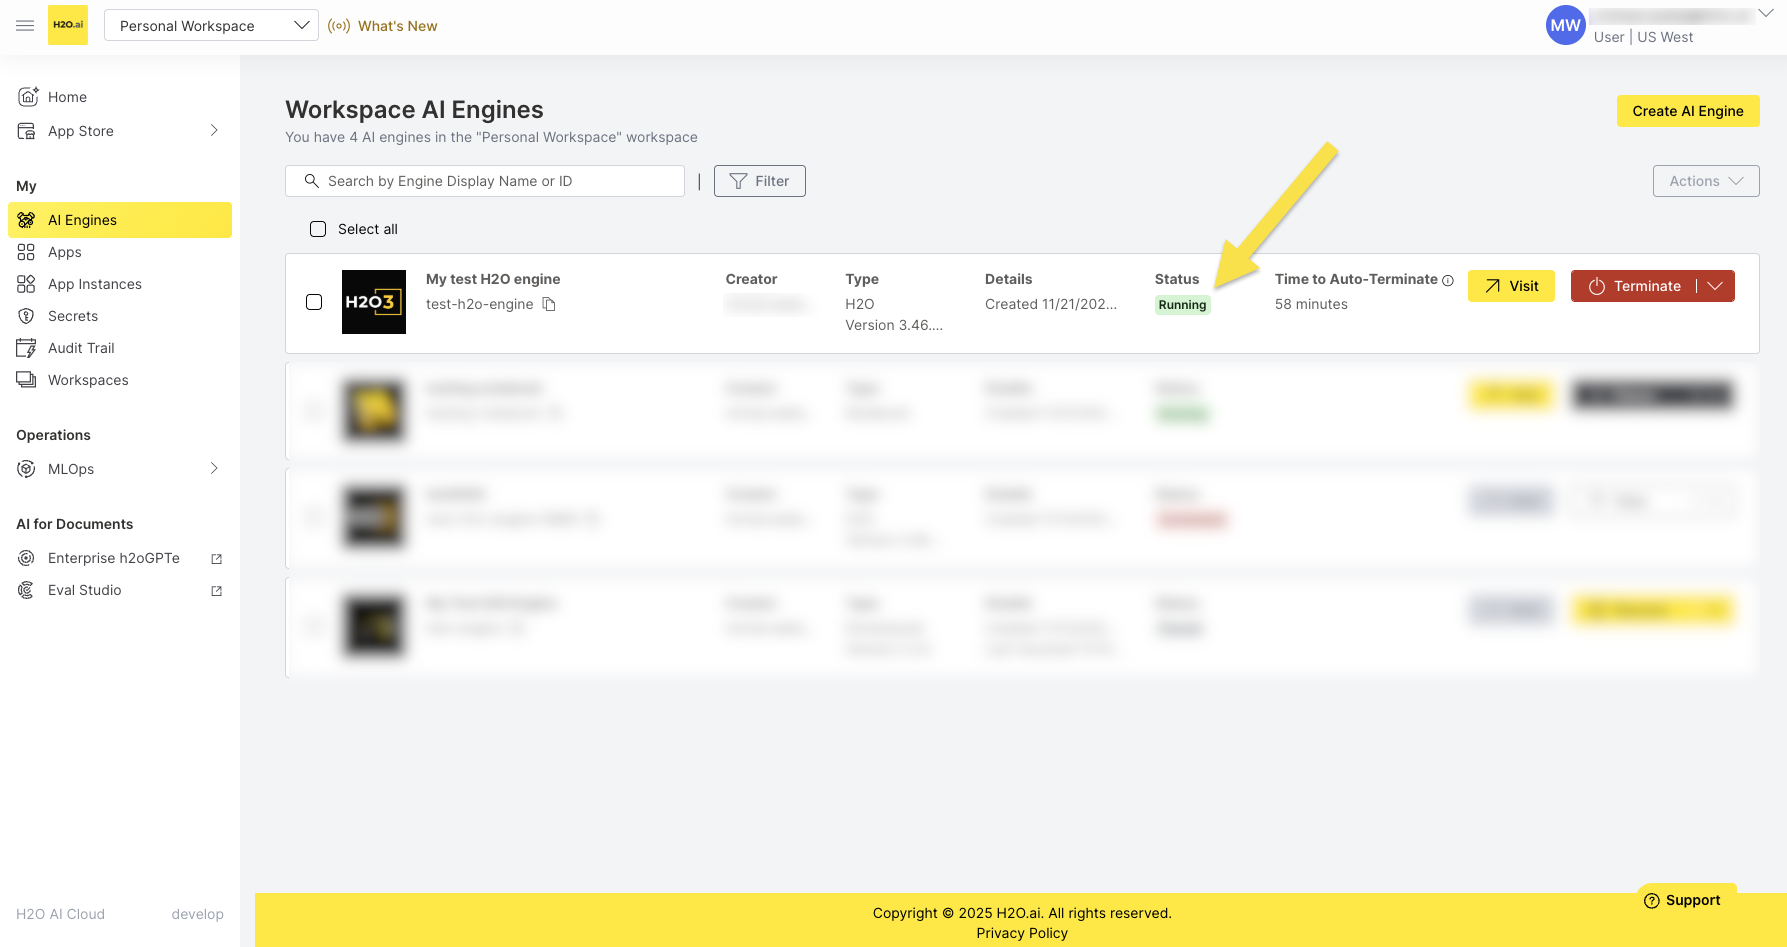

In [7]:
# Connect to the H2O cluster.
h2o.connect(config=engine.get_connection_config())

Connecting to H2O server at https://enginemanager.dev.h2o.ai:443/workspaces/eccc2a35-b79b-4945-83be-a4ad20c56d9e/h2oEngines/test-h2o-engine ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  ---------------------------------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 59 secs
H2O_cluster_timezone:       UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    7 months and 25 days
H2O_cluster_name:           test-h2o-engine
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    14.22 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         https://enginemanager.dev.h2o.ai:443/workspaces/eccc2a35-b79b-4945-83be-a4ad20c56d9e/h2oEngines/test-h2o-engine
H2O_connection_proxy:       null
H2O_internal_security:      False
Python_version:             3.13.9 final
--------------------------  ---------------------------------------------------------------------------------------------------------------

<H2OConnection to https://enginemanager.dev.h2o.ai:443/workspaces/eccc2a35-b79b-4945-83be-a4ad20c56d9e/h2oEngines/test-h2o-engine, no session>

In [9]:
# Terminate the engine (stops it permanently - cannot be restarted, but doesn't delete it).
engine.terminate()

In [13]:
# Wait for engine to terminate.
engine.wait
print(f"Engine is now paused. State: {engine.state}")

Engine is now paused. State: H2OEngineState.STATE_TERMINATED


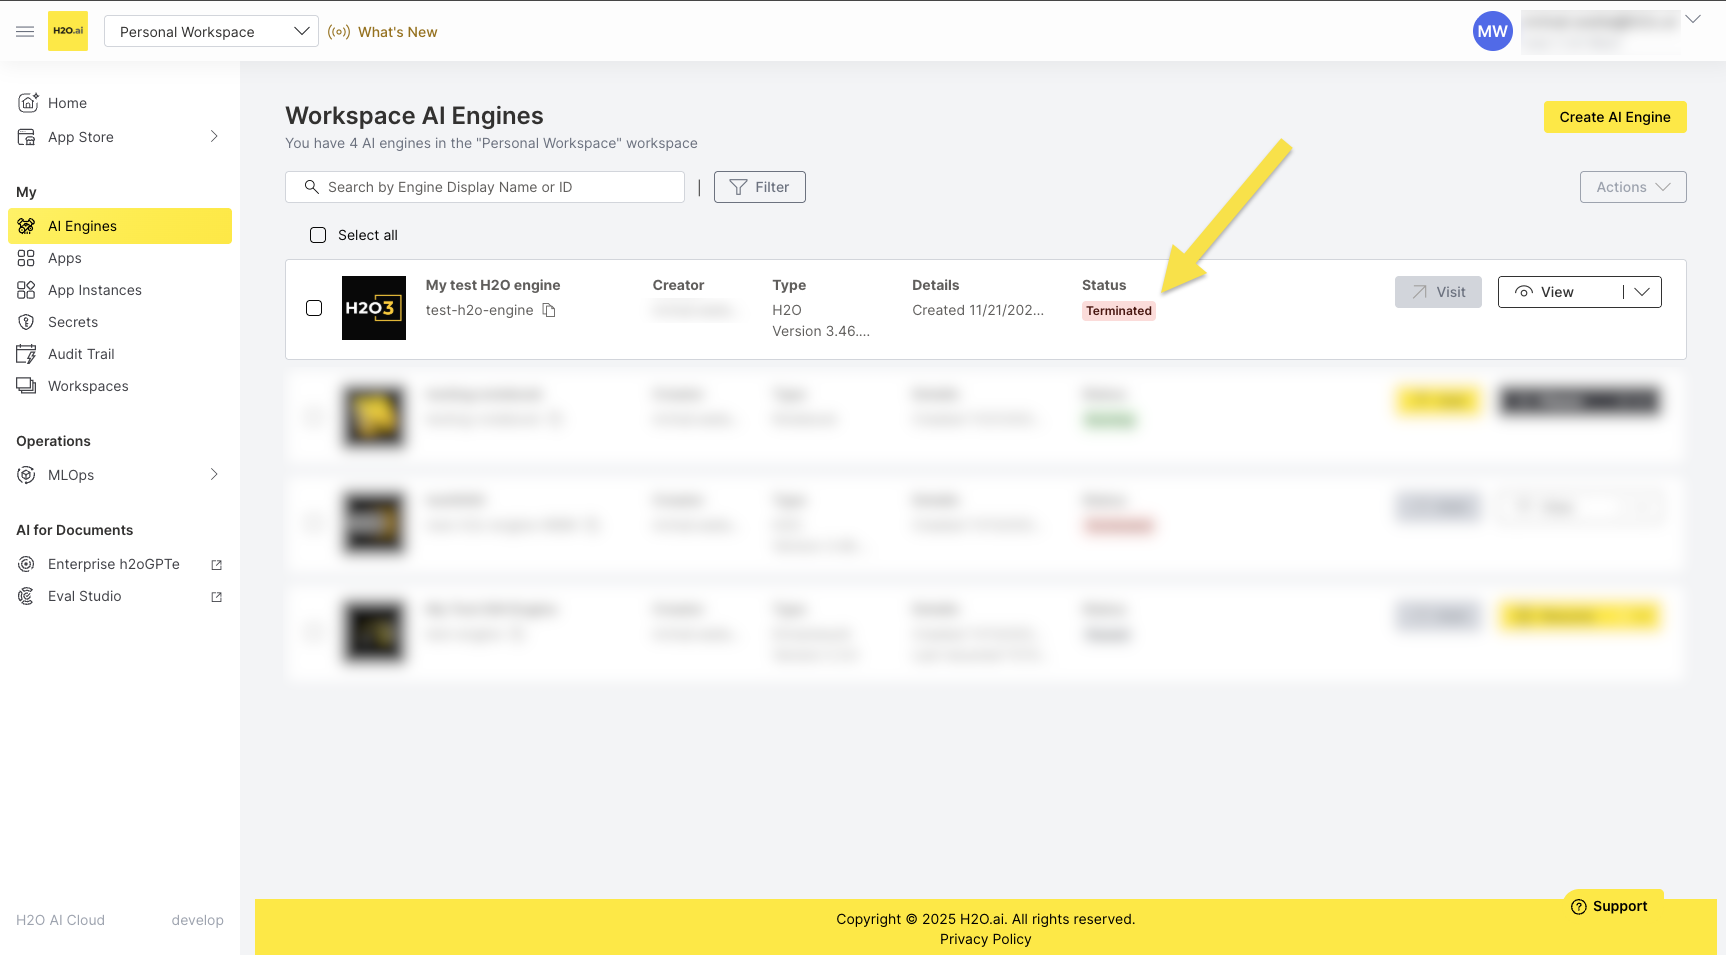

In [14]:
# List all engines in the workspace.
engines = h2o_engine_client.list_all_engines(workspace_id="default")
for eng in engines:
    print(f"Engine: {eng.engine_id}, State: {eng.state}, Display Name: {eng.display_name}")

Engine: test-h2o-engine, State: H2OEngineState.STATE_TERMINATED, Display Name: My test H2O engine
Engine: new-h2o-engine-9966, State: H2OEngineState.STATE_TERMINATED, Display Name: testtttttt


In [15]:
# Get the engine again to check its status.
engine = h2o_engine_client.get_engine(
    workspace_id="default",
    engine_id="test-h2o-engine"
)
print(f"Engine state: {engine.state}")

Engine state: H2OEngineState.STATE_TERMINATED


In [ ]:
# Download engine logs (if engine is running).
# Note: This will only work if the engine is in a running state.
logs = engine.download_logs()
print(logs)

In [ ]:
# Delete the engine. You can `engine.wait()` after, to wait for resources to be released.
engine.delete()
engine.wait()
